In [68]:
# Installing libraries 

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [69]:
#Load the data
data = pd.read_csv("/Users/Avidhanwani/Desktop/GSPC.csv")
data.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-09,2096.560059,2096.560059,2068.239990,2078.580078,2078.580078,3882350000
1,2015-11-10,2077.189941,2083.669922,2069.909912,2081.719971,2081.719971,3821440000
2,2015-11-11,2083.409912,2086.939941,2074.850098,2075.000000,2075.000000,3692410000
3,2015-11-12,2072.290039,2072.290039,2045.660034,2045.969971,2045.969971,4016370000
4,2015-11-13,2044.640015,2044.640015,2022.020020,2023.040039,2023.040039,4278750000
5,2015-11-16,2022.079956,2053.219971,2019.390015,2053.189941,2053.189941,3741240000


In [70]:
data.drop('Low', 1, inplace=True)
data.drop('High', 1, inplace=True)
data.head(6)

,Date,Open,Close,Adj Close,Volume
0,2015-11-09,2096.560059,2078.580078,2078.580078,3882350000
1,2015-11-10,2077.189941,2081.719971,2081.719971,3821440000
2,2015-11-11,2083.409912,2075.000000,2075.000000,3692410000
3,2015-11-12,2072.290039,2045.969971,2045.969971,4016370000
4,2015-11-13,2044.640015,2023.040039,2023.040039,4278750000
5,2015-11-16,2022.079956,2053.189941,2053.189941,3741240000


In [71]:
#Number of trading days
data.shape

(1259, 5)

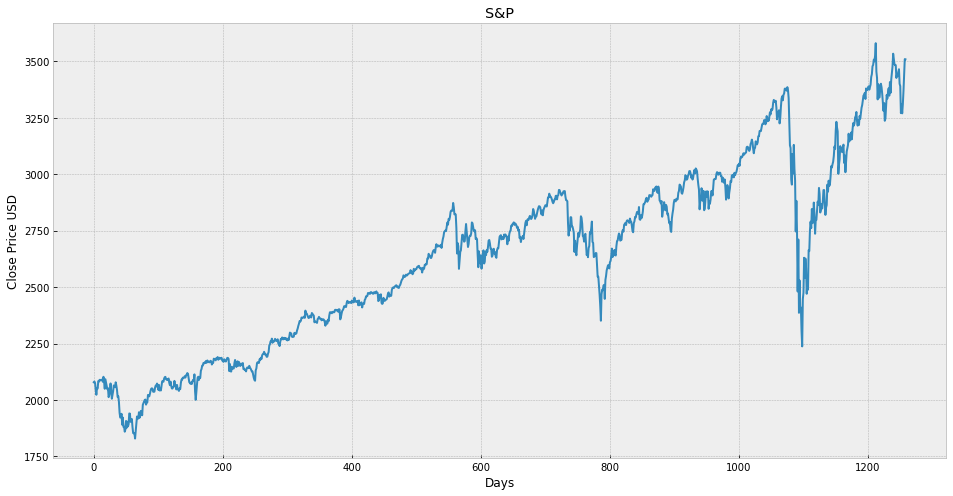

In [72]:
plt.figure(figsize=(16,8))
plt.title('S&P')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(data['Close'])
plt.show()

In [73]:
data = data[['Close']]
data.head(6)

,Close
0,2078.580078
1,2081.719971
2,2075.000000
3,2045.969971
4,2023.040039
5,2053.189941


In [74]:
# Create a variable to predicts 'x' days into future
future_days = 8
# Create a new column containing (target) data to predict 'x' days into future
data['Prediction'] = data[['Close']].shift(-future_days)
data.tail(6)

,Close,Prediction
1253,3269.959961,NaN
1254,3310.239990,NaN
1255,3369.159912,NaN
1256,3443.439941,NaN
1257,3510.449951,NaN
1258,3509.439941,NaN


In [75]:
#Create the feature data set (X), convert to numpy array and remove last 'x' rows/days
X = np.array(data.drop(['Prediction'], 1))[:-future_days]
print(X)

[[2078.580078]
 [2081.719971]
 [2075.      ]
 ...
 [3465.389893]
 [3400.969971]
 [3390.679932]]


In [76]:
#Create the feature data set (y), convert to numpy array and get all the target values except last 'x' rows/days
y = np.array(data['Prediction'])[:-future_days]
print(y)

[2081.23999  2089.169922 2086.590088 ... 3443.439941 3510.449951
 3509.439941]


In [77]:
#Split the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [78]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(X_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(X_train, y_train)

In [79]:
#Get the last 'x' rows/days of feature data set
x_future = data.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[3483.810059],
       [3426.919922],
       [3443.120117],
       [3435.560059],
       [3453.48999 ],
       [3465.389893],
       [3400.969971],
       [3390.679932]])

In [80]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)


[3271.030029 3310.110107 3269.959961 3310.23999  3369.159912 3443.439941
 3298.459961 3526.649902]

[3476.01146898 3420.21472028 3436.10355896 3428.68879994 3446.27413032
 3457.94532558 3394.76350903 3384.67123732]


<ipython-input-81-d2e206addc3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


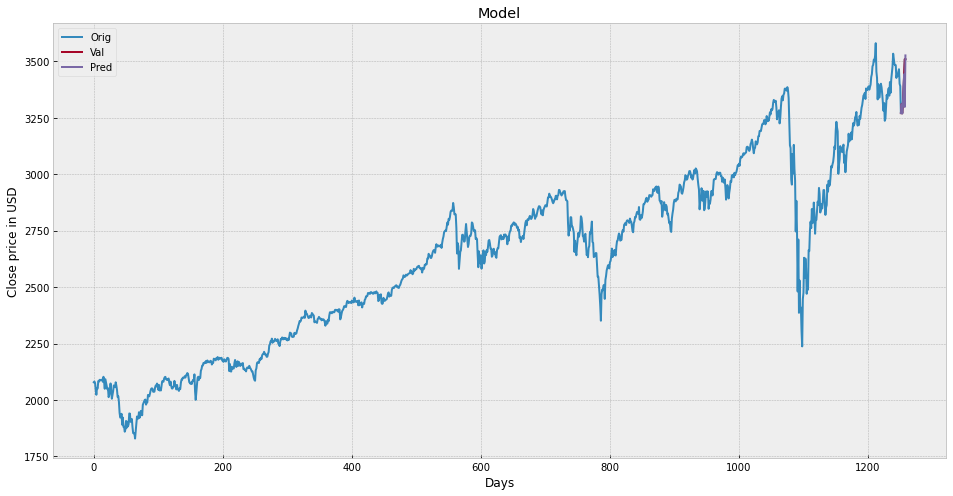

In [81]:
pred = tree_prediction

valid = data[X.shape[0]:]
valid['Predictions'] = pred
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close price in USD')
plt.title('Model')
plt.plot(data['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

<ipython-input-82-ba5824e16064>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


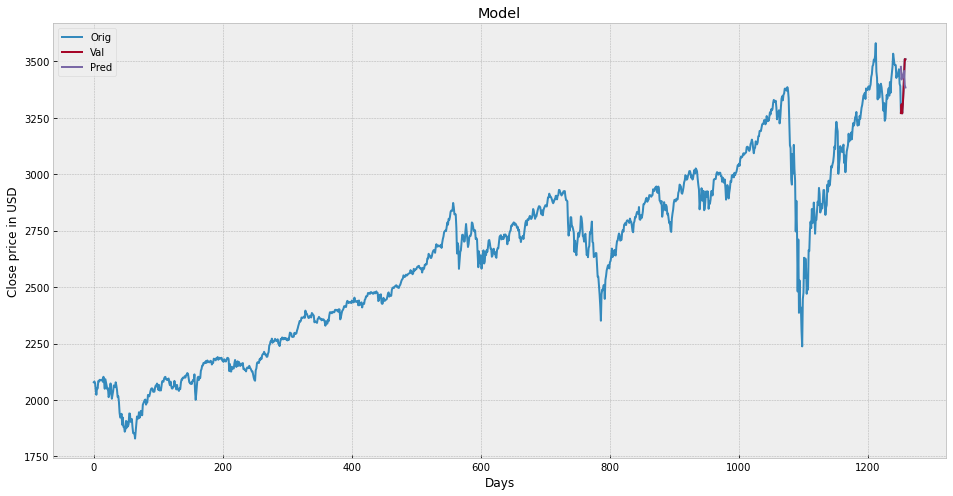

In [82]:
pred = lr_prediction

valid = data[X.shape[0]:]
valid['Predictions'] = pred
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close price in USD')
plt.title('Model')
plt.plot(data['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [84]:
#Load the current data (11/07/2020 - 11/18/2020) for model comparison
current_data = pd.read_csv('/Users/Avidhanwani/Desktop/GSPC_1.csv')
current_data.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-09,3583.040039,3645.989990,3547.479980,3550.500000,3550.500000,8556610000
1,2020-11-10,3543.260010,3557.219971,3511.909912,3545.530029,3545.530029,6024230000
2,2020-11-11,3563.219971,3581.159912,3557.000000,3572.659912,3572.659912,4609970000
3,2020-11-12,3562.669922,3569.020020,3518.580078,3537.010010,3537.010010,4890120000
4,2020-11-13,3552.570068,3593.659912,3552.570068,3585.149902,3585.149902,4709670000
5,2020-11-16,3600.159912,3628.510010,3600.159912,3626.909912,3626.909912,5281980000


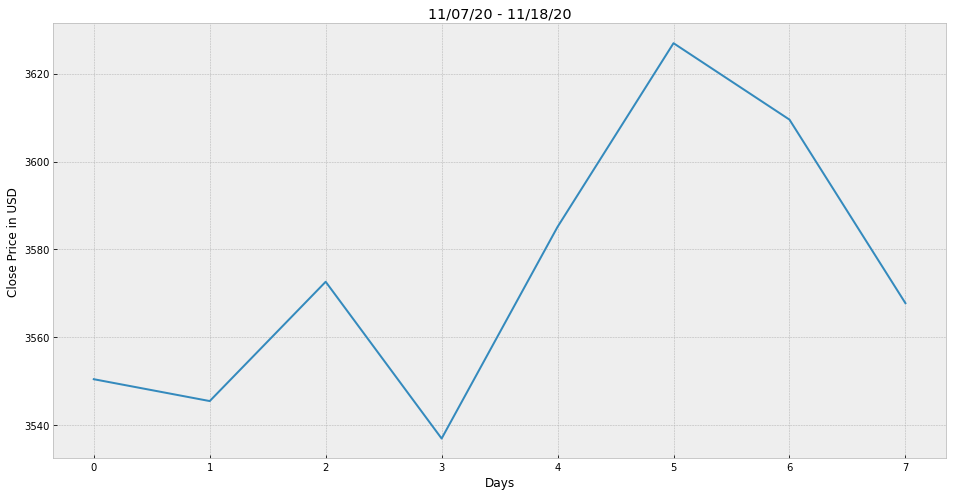

In [86]:
#Visualize the current data with close price
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.title('11/07/20 - 11/18/20')
plt.plot(current_data['Close'])
plt.show()

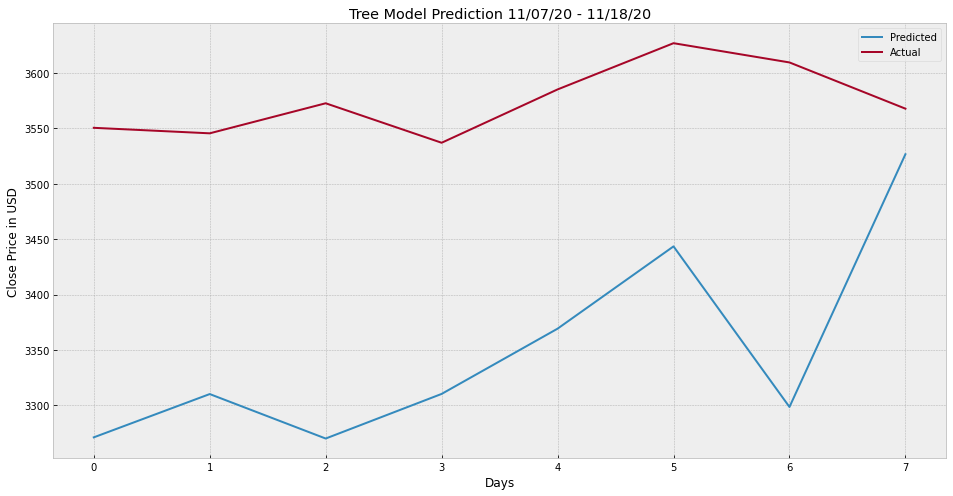

In [90]:
#Visualize the tree prediction
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.title('Tree Model Prediction 11/07/20 - 11/18/20')
plt.plot(tree_prediction)
plt.plot(current_data['Close'])
plt.legend(['Predicted', 'Actual'])
plt.show()

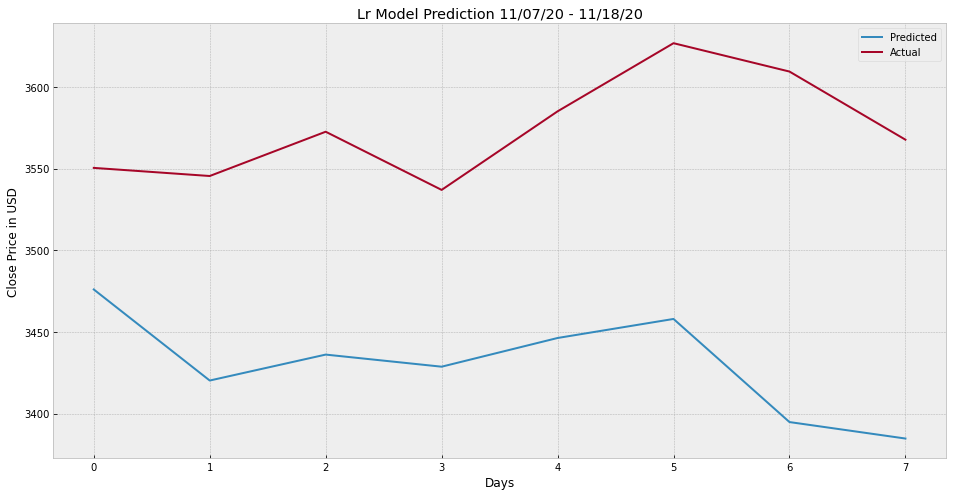

In [91]:
#Visualize the Linear Regression Model with Actual
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.title('Lr Model Prediction 11/07/20 - 11/18/20')
plt.plot(lr_prediction)
plt.plot(current_data['Close'])
plt.legend(['Predicted', 'Actual'])
plt.show()

In [92]:
print(lr.score(X_test, y_test))


0.9562620855622156
